# Citibike NYC October 2019 Dataset Exploration

For this analysis, I am particularly interested in finding out where in the city did most of the bike rental happen in October 2019. Once the areas with the most bike rental activities are located, I am interested in understanding the composition of the users of rentals in these area, with an intention of providing insights to marketing agencies.

In [29]:
# import all packages and set plots to be embedded inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Image
%matplotlib inline

Image(url = 'https://d21xlh2maitm24.cloudfront.net/nyc/biking-in-nyc.png?mtime=20170103145903',width=700)

In [30]:
# load in the dataset into a pandas dataframe, print statistics
data = r"C:\Users\Moysar\Downloads\archive\201809-citibike-tripdata.csv"
df = pd.read_csv(data)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877884 entries, 0 to 1877883
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         float64
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           float64
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(6), int64(4), object(5)
memory usage: 214.9+ MB


In [32]:
df.sample()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1318494,605,2018-09-21 22:55:45.2890,2018-09-21 23:05:51.0040,3658.0,W 18 St & 9 Ave,40.743534,-74.003676,526.0,E 33 St & 5 Ave,40.747659,-73.984907,27108,Subscriber,1987,0


### What is the structure of your dataset?

There are 1877884 entries in the dataset with 15 features, including:
- Trip Duration (seconds)
- Start Time and Date
- Stop Time and Date
- Start Station Name
- End Station Name
- Station ID
- Station Lat/Long
- Bike ID
- User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
- Gender (Zero=unknown; 1=male; 2=female)
- Year of Birth

### What is/are the main feature(s) of interest in your dataset?

As stated in the introduction, I am particularly interested in finding out where in the city do most of the bike rental happens in October 2019. Start station and end station name will be the first two features to look at, in order to find the area with the most bike rental activities. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To make a visualization of the rental activities on a New York City map, we can use the latitude/longitude informations of the stations. To understand the composition of the rental users in these areas we can use the gender, user type and year of birth features.

## Univariate Exploration

I'll start by looking into the 5 most popular start station and end stations.

In [33]:
top5_start = df['start station name'].value_counts()[:5]
top5_start

Pershing Square North    13968
E 17 St & Broadway       11302
Broadway & E 22 St       10875
West St & Chambers St    10789
W 21 St & 6 Ave          10322
Name: start station name, dtype: int64

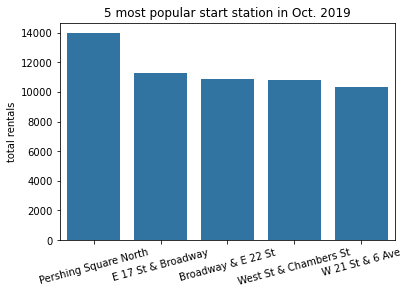

In [34]:
base_color = sb.color_palette()[0]
chart = sb.barplot(top5_start.index.values, top5_start, color = base_color)
chart.set_xticklabels(chart.get_xticklabels(), rotation=15);
chart.set_ylabel('total rentals')
chart.set_title('5 most popular start station in Oct. 2019');

In [35]:
top5_end = df['end station name'].value_counts()[:5]
top5_end

Pershing Square North    13834
E 17 St & Broadway       11964
West St & Chambers St    11173
Broadway & E 22 St       10962
W 21 St & 6 Ave          10431
Name: end station name, dtype: int64

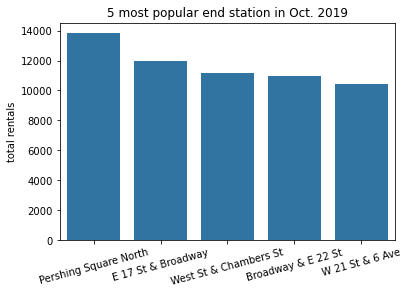

In [36]:
base_color = sb.color_palette()[0]
chart = sb.barplot(top5_end.index.values, top5_end, color = base_color)
chart.set_xticklabels(chart.get_xticklabels(), rotation=15);
chart.set_ylabel('total rentals')
chart.set_title('5 most popular end station in Oct. 2019');

Unsurprisingly, the top 5 start stations and top 5 end stations are the same stations. 4 of the 5 stations are close to an obvious landmark.

1. **Pershing Square North** -> Grand Central Station
2. **E 17 St & Broadway** -> Union Square 
3. **Broadway & E 22 St** -> Flatiron Building
4. **W 21 St & 6 Ave** -> In the center of Midtown, but no obvious landmark
5. **8 Ave & W 33 St** -> Penn Station

Before moving on to bivariate exploration, we can also look at the gender and usertype to establish a refernce point for later analysis.

In [37]:
n = df.shape[0]
df['gender'].value_counts()/n

1    0.660831
2    0.246785
0    0.092384
Name: gender, dtype: float64

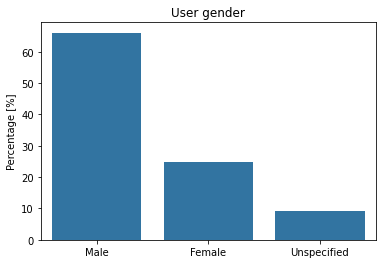

In [38]:
gender_list = ['Male', 'Female', 'Unspecified'];
chart = sb.barplot(gender_list, df['gender'].value_counts()/n * 100, color = base_color)
chart.set_ylabel('Percentage [%]')
chart.set_title('User gender');

We can exclude the unspecified rows and see the adjusted percentages.

In [39]:
n2 = df.query('gender !=0').shape[0]
(df['gender'].value_counts()/n2)[:2]

1    0.728096
2    0.271904
Name: gender, dtype: float64

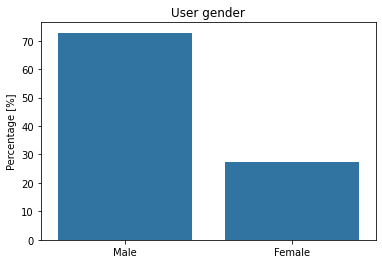

In [40]:
gender_list = ['Male', 'Female'];
chart = sb.barplot(gender_list, (df['gender'].value_counts()/n2)[:2]* 100, color = base_color)
chart.set_ylabel('Percentage [%]')
chart.set_title('User gender');

In [41]:
df['usertype'].value_counts()/n

Subscriber    0.860932
Customer      0.139068
Name: usertype, dtype: float64

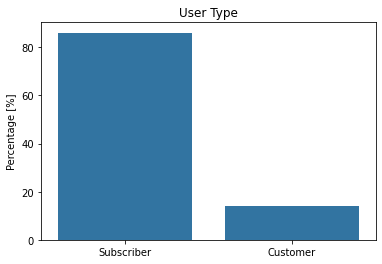

In [42]:
usertype_list = ['Subscriber', 'Customer'];
chart = sb.barplot(usertype_list, (df['usertype'].value_counts()/n)* 100, color = base_color)
chart.set_ylabel('Percentage [%]')
chart.set_title('User Type');

In [43]:
df['usertype'].value_counts()

Subscriber    1616731
Customer       261153
Name: usertype, dtype: int64

We see that the users of citibikes are primarily male (~74%). The users are also overwhelmingly subscribers of Citibike (~90%), indicating that they use the service frequently.


## Bivariate Exploration

For this part of the analysis, we can focus on the top 5 stations, and compare how the demographics of each station differ from the others and city-wide averages.

Here I'd like to extract gender and usertype data for each of the 5 stations, and compare them using stacked bar charts. 

In [44]:
top5_list = top5_start.index.values

total_traffic = []
female_list = []
male_list = []
customer_list = []
subscriber_list = []

for i in range(5):
    df_temp = df[(df['start station name'] == top5_list[i]) | (df['end station name'] == top5_list[i])]
    
    total_traffic.append(len(df_temp)) # used later in multivariate exploration
    
    gender_specified = df_temp.query('gender != 0').shape[0] # total of number of entries with specified gender
    male_list.append(df_temp.query('gender == 1').shape[0]/gender_specified)
    female_list.append(df_temp.query('gender == 2').shape[0]/gender_specified)
    
    subscriber_list.append(df_temp.query('usertype == "Subscriber"').shape[0]/len(df_temp))
    customer_list.append(df_temp.query('usertype == "Customer"').shape[0]/len(df_temp))

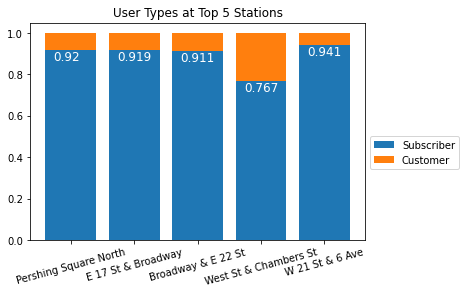

In [45]:
baselines = np.zeros(5)
plt.bar(x = np.arange(5), height = subscriber_list, bottom = baselines)
baselines += subscriber_list
plt.bar(x = np.arange(5), height = customer_list, bottom = baselines)

plt.xticks(np.arange(5), top5_list, rotation = 15)
plt.legend(['Subscriber','Customer'],bbox_to_anchor = (1, 0.5))
plt.title('User Types at Top 5 Stations')
for i in range(5):
    plt.text(x = np.arange(5)[i]-0.27, y = subscriber_list[i]-0.05, s = round(subscriber_list[i],3), size = 12, color = 'white')

Surprisingly, at the top 5 stations, where one would expect more tourists and thus higher (short-term) customer percentages, the percentages of subscribers are even slightly above the city average of 90%. 

With a quick look at the pricing scheme of Citibike (https://www.citibikenyc.com/pricing) we see that the 1-year subcription (\$169/year = \$14/month) is a much more attractive deal for users who use the bikeshare for more than 1 day (\$12 for daypass) every month for 12 months. From this, we can deduce that the majority of the traffic is contributed by users who are commited to using the service frequently, likely New York City residents.

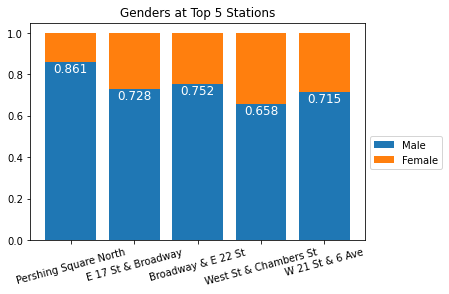

In [46]:
baselines = np.zeros(5)
plt.bar(x = np.arange(5), height = male_list, bottom = baselines)
baselines += male_list
plt.bar(x = np.arange(5), height = female_list, bottom = baselines)

plt.xticks(np.arange(5), top5_list, rotation = 15)
plt.legend(['Male','Female'],bbox_to_anchor = (1, 0.5))
plt.title('Genders at Top 5 Stations')
for i in range(5):
    plt.text(x = np.arange(5)[i]-0.27, y = male_list[i]-0.05, s = round(male_list[i],3), size = 12, color = 'white')

Here we see that the male percentages are even higher at stations close to the train station. 

## Multivariate Exploration

Here we can display the informations we obtained (gender percentage, subscriber percentage) on a New York City map using the lat/long data and a library called folium. In fact, we can broaden our reach to the top 100 stations to get a better idea of the Citibike usage.

To start, we create a new dataframe with the necessary information.

In [47]:
# This cell takes about 1 minute to run
import folium

# Retrieve lat/long information
top100_list = df['start station name'].value_counts()[:100].index.values

lat_list = []
long_list = []
total_traffic = []
female_list = []
male_list = []
customer_list = []
subscriber_list = []

for i in range(100):
    df_temp = df[(df['start station name'] == top100_list[i]) | (df['end station name'] == top100_list[i])]
    
    total_traffic.append(len(df_temp)) # used later in multivariate exploration
    
    gender_specified = df_temp.query('gender != 0').shape[0] # total of number of entries with specified gender
    male_list.append(df_temp.query('gender == 1').shape[0]/gender_specified)
    female_list.append(df_temp.query('gender == 2').shape[0]/gender_specified)
    
    subscriber_list.append(df_temp.query('usertype == "Subscriber"').shape[0]/len(df_temp))
    customer_list.append(df_temp.query('usertype == "Customer"').shape[0]/len(df_temp))

    df_samp = df[df['start station name'] == top100_list[i]]
    lat_list.append(df_samp['start station latitude'].value_counts().index.values[0])
    long_list.append(df_samp['start station longitude'].value_counts().index.values[0])

# Create new dataframe
data = {'station_name': top100_list,
        'total_traffic': total_traffic,
        'male_percentage': male_list,
        'subscriber_percentage': subscriber_list,
        'latitude': lat_list,
        'longitude': long_list}

df_top100 = pd.DataFrame(data)
df_top100

,station_name,total_traffic,male_percentage,subscriber_percentage,latitude,longitude
0,Pershing Square North,27713,0.861124,0.919713,40.751873,-73.977706
1,E 17 St & Broadway,23164,0.728390,0.918969,40.737050,-73.990093
2,Broadway & E 22 St,21736,0.751899,0.911023,40.740343,-73.989551
3,West St & Chambers St,21653,0.658284,0.766961,40.717548,-74.013221
4,W 21 St & 6 Ave,20657,0.714939,0.940650,40.741740,-73.994156
...,...,...,...,...,...,...
95,E 33 St & 1 Ave,10232,0.774544,0.931099,40.743227,-73.974498
96,W 13 St & 6 Ave,10204,0.735799,0.923951,40.736494,-73.997044
97,Stanton St & Chrystie St,10203,0.709017,0.874841,40.722293,-73.991475
98,E 11 St & 1 Ave,10088,0.732426,0.902756,40.729538,-73.984267


In [48]:
# Referenece for folium: https://blog.prototypr.io/interactive-maps-with-python-part-1-aa1563dbe5a9

folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

# Iterate through the 5 stations to create markers
for index, row in df_top100.iterrows():
    radius = row['total_traffic']/1800 #radius corresponds to total traffic of the station
    
    # Top 10 will be in tangerine
    if index > 9:
        color="#0A8A9F" # teal
    else:
        color="#E37222" # tangerine
        
    popup_text = """<b>{}</b><br>
                total traffic: {}<br> 
                subscriber percentage: {}<br>
                male percentage: {}"""
    popup_text = popup_text.format(row["station_name"],
                               row["total_traffic"],
                               round(row["subscriber_percentage"],3),
                               round(row["male_percentage"],3))    
    folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius=radius,
                        color=color,
                        popup=popup_text,
                        fill=True).add_to(folium_map)

In [49]:
#Display map
folium_map

With the visualisation, we can see that the most of the traffic happen in Manhattan, mostly south of central park. Out of the top 10 stations, colored in tangerine, 8 are in midtown and 2 in downtown. Only 2 out of the top 100 stations are in Brooklyn. 

We can also use the map to highlight the top 10 stations with highest female percentages.

In [50]:
df_top100.nsmallest(10, 'male_percentage')

,station_name,total_traffic,male_percentage,subscriber_percentage,latitude,longitude
72,5 Ave & E 88 St,11042,0.635467,0.373845,40.783070,-73.959390
3,West St & Chambers St,21653,0.658284,0.766961,40.717548,-74.013221
90,Metropolitan Ave & Bedford Ave,10494,0.658597,0.868115,40.715348,-73.960241
89,Kent Ave & N 7 St,10457,0.660567,0.770967,40.720368,-73.961651
9,Central Park S & 6 Ave,17129,0.669573,0.455076,40.765909,-73.976342
69,South St & Gouverneur Ln,11389,0.682922,0.780929,40.703554,-74.006702
32,Grand St & Elizabeth St,14030,0.683839,0.867641,40.718822,-73.995960
46,MacDougal St & Prince St,12670,0.684650,0.904420,40.727103,-74.002971
64,Little West St & 1 Pl,11555,0.687095,0.732583,40.705693,-74.016777
5,12 Ave & W 40 St,19760,0.690481,0.690587,40.760875,-74.002777


In [51]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

# Iterate through the 5 stations to create markers
for index, row in df_top100.iterrows():
    radius = row['total_traffic']/1800 #radius corresponds to total traffic of the station
    
    if index in df_top100.nsmallest(10, 'male_percentage').index.tolist():
        color="#0A8A9F" # teal
    else:
        color="#E37222" # tangerine
        
        
    popup_text = """<b>{}</b><br>
                total traffic: {}<br> 
                subscriber percentage: {}<br>
                male percentage: {}"""
    popup_text = popup_text.format(row["station_name"],
                               row["total_traffic"],
                               round(row["subscriber_percentage"],3),
                               round(row["male_percentage"],3))    
    folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius=radius,
                        color=color,
                        popup=popup_text,
                        fill=True).add_to(folium_map)

In [52]:
folium_map 

Interestingly, we see that the stations with the highest female user percentages are in downtown (6 out of 10), around central park (3 out of 10), and in Brooklyn. 

Finally, we use the map to highlight the top 10 stations with highest (short-term) customer percentages.

In [53]:
df_top100.nsmallest(10, 'subscriber_percentage')

,station_name,total_traffic,male_percentage,subscriber_percentage,latitude,longitude
72,5 Ave & E 88 St,11042,0.635467,0.373845,40.783070,-73.959390
9,Central Park S & 6 Ave,17129,0.669573,0.455076,40.765909,-73.976342
23,Centre St & Chambers St,14702,0.711769,0.537138,40.712733,-74.004607
51,Central Park West & W 72 St,11583,0.690753,0.538116,40.775794,-73.976206
43,Grand Army Plaza & Central Park S,11240,0.742017,0.586388,40.764397,-73.973715
37,Pier 40 - Hudson River Park,13332,0.693194,0.629838,40.727714,-74.011296
70,Central Park West & W 68 St,10570,0.695414,0.674456,40.773407,-73.977825
5,12 Ave & W 40 St,19760,0.690481,0.690587,40.760875,-74.002777
64,Little West St & 1 Pl,11555,0.687095,0.732583,40.705693,-74.016777
42,Washington St & Gansevoort St,12906,0.694747,0.742600,40.739323,-74.008119


In [54]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

# Iterate through the 5 stations to create markers
for index, row in df_top100.iterrows():
    radius = row['total_traffic']/1800 #radius corresponds to total traffic of the station
    
    if index in df_top100.nsmallest(10, 'subscriber_percentage').index.tolist():
        color="#0A8A9F" # teal
    else:
        color="#E37222" # tangerine
        
        
    popup_text = """<b>{}</b><br>
                total traffic: {}<br> 
                subscriber percentage: {}<br>
                male percentage: {}"""
    popup_text = popup_text.format(row["station_name"],
                               row["total_traffic"],
                               round(row["subscriber_percentage"],3),
                               round(row["male_percentage"],3))    
    folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius=radius,
                        color=color,
                        popup=popup_text,
                        fill=True).add_to(folium_map)

In [55]:
folium_map 

We see that the 10 stations with the highest non-subscriber (likely tourist) percentages are around central park (5 out of 10), along hudson river (4 out of 10), and in financial district (3 out of 10).

## Summary

With the earlier exploration, we see that: 
- majority of the Citibike users in October 2019 are subscribers (90% overall) and male (74% overall)
- compositions of 5 most popular stations adhere to this trend 

Then we visualized the top 100 most popular stations, highlighting the 10 stations with most female percentages and the 10 stations with most non-subscriber percentages. Interestingly, these top 10s do not coincide with the 10 most populat stations. 

### Insights:
These insights can be use for marketing agencies, if they want to advertise to specific groups of Citibike users. For example, a city-wide advertisement campaign using Citibike system would be shown to a predominantly male audience, mostly of whom are likely New York City residents. 

And if agencies want to advertise to female users, they would do well placing advertisements:
- around Central Park
- south of 14th St.

If agencies want to advertise to non-subscribers, they should consider placing advertisements:
- around Central Park
- along Hudson River
- in Financial District.